In [7]:
import json
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
def read_game_data(file_path):
    games = []
    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:  # Skip empty lines
                continue
            try:
                game_data = json.loads(line)
                games.append(game_data)
            except json.JSONDecodeError:
                print(f"Warning: Skipping invalid JSON line: {line}")
    return games

In [9]:
file_path = 'game_data.txt'
games = read_game_data(file_path)

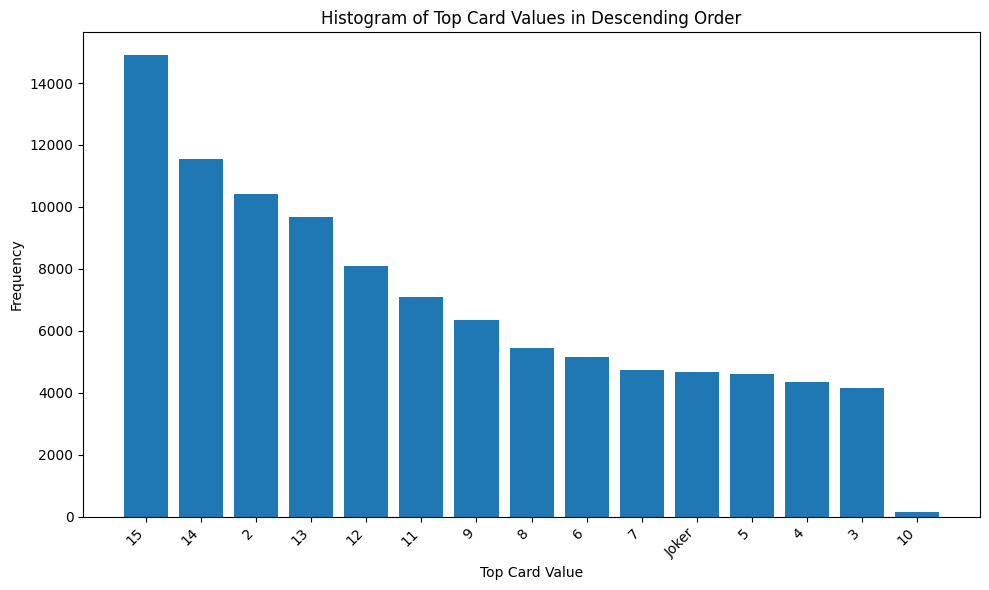

In [16]:
def top_card_hist(games):
    # Extract top cards from the game data and get their values
    top_card_values = [game['top_card'].split(' ')[0] for game in games if game['top_card']]

    # Count the occurrences of each top card value
    top_card_value_counts = Counter(top_card_values)

    # Sort the top card values by frequency in descending order
    sorted_top_card_values = sorted(top_card_value_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_value_names = [value[0] for value in sorted_top_card_values]
    sorted_value_counts = [value[1] for value in sorted_top_card_values]

    # Create a histogram of top card values in descending order
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_value_names, sorted_value_counts)
    plt.xlabel('Top Card Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Top Card Values in Descending Order')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

top_card_hist(games)

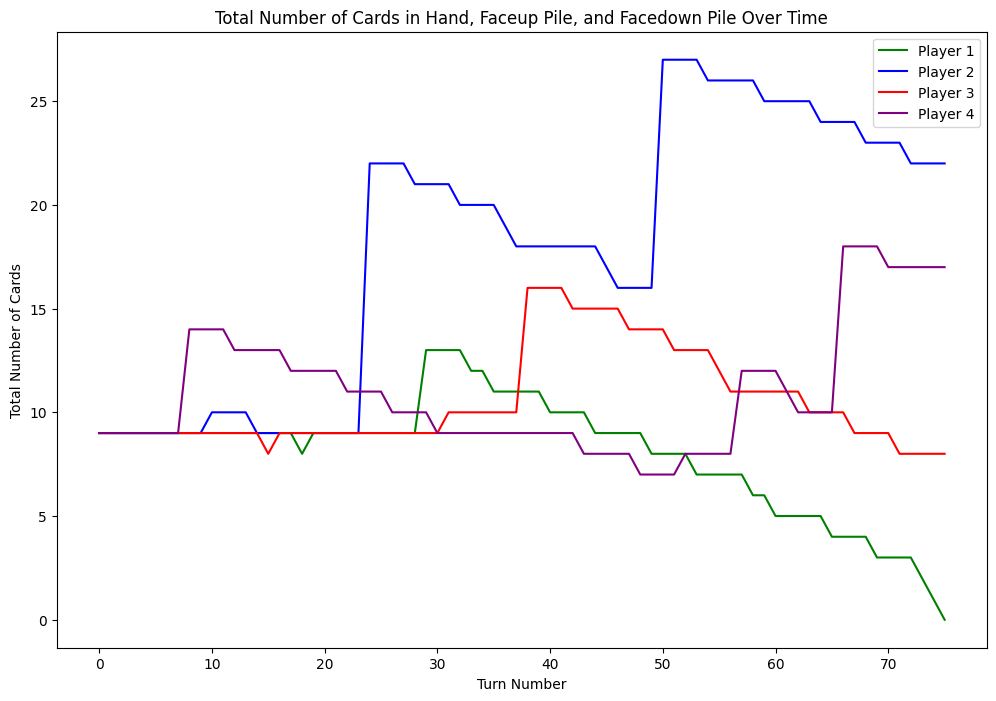

In [22]:
def player_hand_sizes(games_data):
        # Filter the data for a single game
    game_number = 7
    single_game_data = [turn for turn in games if turn['game_number'] == game_number]

    # Initialize lists to store the total number of cards for each player
    total_cards_player1 = []
    total_cards_player2 = []
    total_cards_player3 = []
    total_cards_player4 = []

    # Iterate through each turn and calculate the total number of cards for each player
    for turn in single_game_data:
        total_cards_player1.append(turn['num_cards_in_hands'][0] + turn['num_face_up_cards'][0] + turn['num_face_down_cards'][0])
        total_cards_player2.append(turn['num_cards_in_hands'][1] + turn['num_face_up_cards'][1] + turn['num_face_down_cards'][1])
        total_cards_player3.append(turn['num_cards_in_hands'][2] + turn['num_face_up_cards'][2] + turn['num_face_down_cards'][2])
        total_cards_player4.append(turn['num_cards_in_hands'][3] + turn['num_face_up_cards'][3] + turn['num_face_down_cards'][3])

    # Plot the data
    plt.figure(figsize=(12, 8))
    plt.plot(total_cards_player1, label='Player 1', color='green')
    plt.plot(total_cards_player2, label='Player 2', color='blue')
    plt.plot(total_cards_player3, label='Player 3', color='red')
    plt.plot(total_cards_player4, label='Player 4', color='purple')
    plt.xlabel('Turn Number')
    plt.ylabel('Total Number of Cards')
    plt.title('Total Number of Cards in Hand, Faceup Pile, and Facedown Pile Over Time')
    plt.legend()
    plt.show()

player_hand_sizes(games)